,all valid
CSJSampling-0.3,4.870370
CSJSampling-0.2,5.981481
QuasiGreedyBatch-0.1,6.314815
CSJSampling-0.4,6.407407
QuasiGreedyBatch-0.2,6.814815
CSJSampling-0.1,7.425926
CSJSampling-0.5,7.462963
QuasiGreedyBatch-0.4,7.555556
QuasiGreedyBatch-0.3,7.962963
UncertaintySampling,8.333333


,duds valid
QuasiGreedyBatch-0.1,4.574074
QuasiGreedyBatch-0.2,4.796296
QuasiGreedyBatch-0.3,5.740741
UncertaintySampling,5.870370
QuasiGreedyBatch-0.4,6.111111
CSJSampling-0.2,6.722222
CSJSampling-0.4,6.759259
CSJSampling-0.3,7.092593
CSJSampling-0.1,7.222222
CSJSampling-0.5,8.425926


,all aleph
CSJSampling-0.3,7.129630
QuasiGreedyBatch-0.2,7.240741
CSJSampling-0.2,7.425926
CSJSampling-0.4,8.000000
CSJSampling-0.1,8.259259
UncertaintySampling,8.277778
QuasiGreedyBatch-0.1,8.907407
CSJSampling-0.5,9.074074
QuasiGreedyBatch-0.4,9.166667
QuasiGreedyBatch-0.3,9.277778


,duds aleph
QuasiGreedyBatch-0.3,6.314815
QuasiGreedyBatch-0.1,6.555556
QuasiGreedyBatch-0.4,6.648148
CSJSampling-0.1,6.703704
CSJSampling-0.2,6.722222
QuasiGreedyBatch-0.2,7.166667
UncertaintySampling,7.796296
CSJSampling-0.5,7.944444
QuasiGreedyBatch-0.5,7.944444
CSJSampling-0.3,8.277778


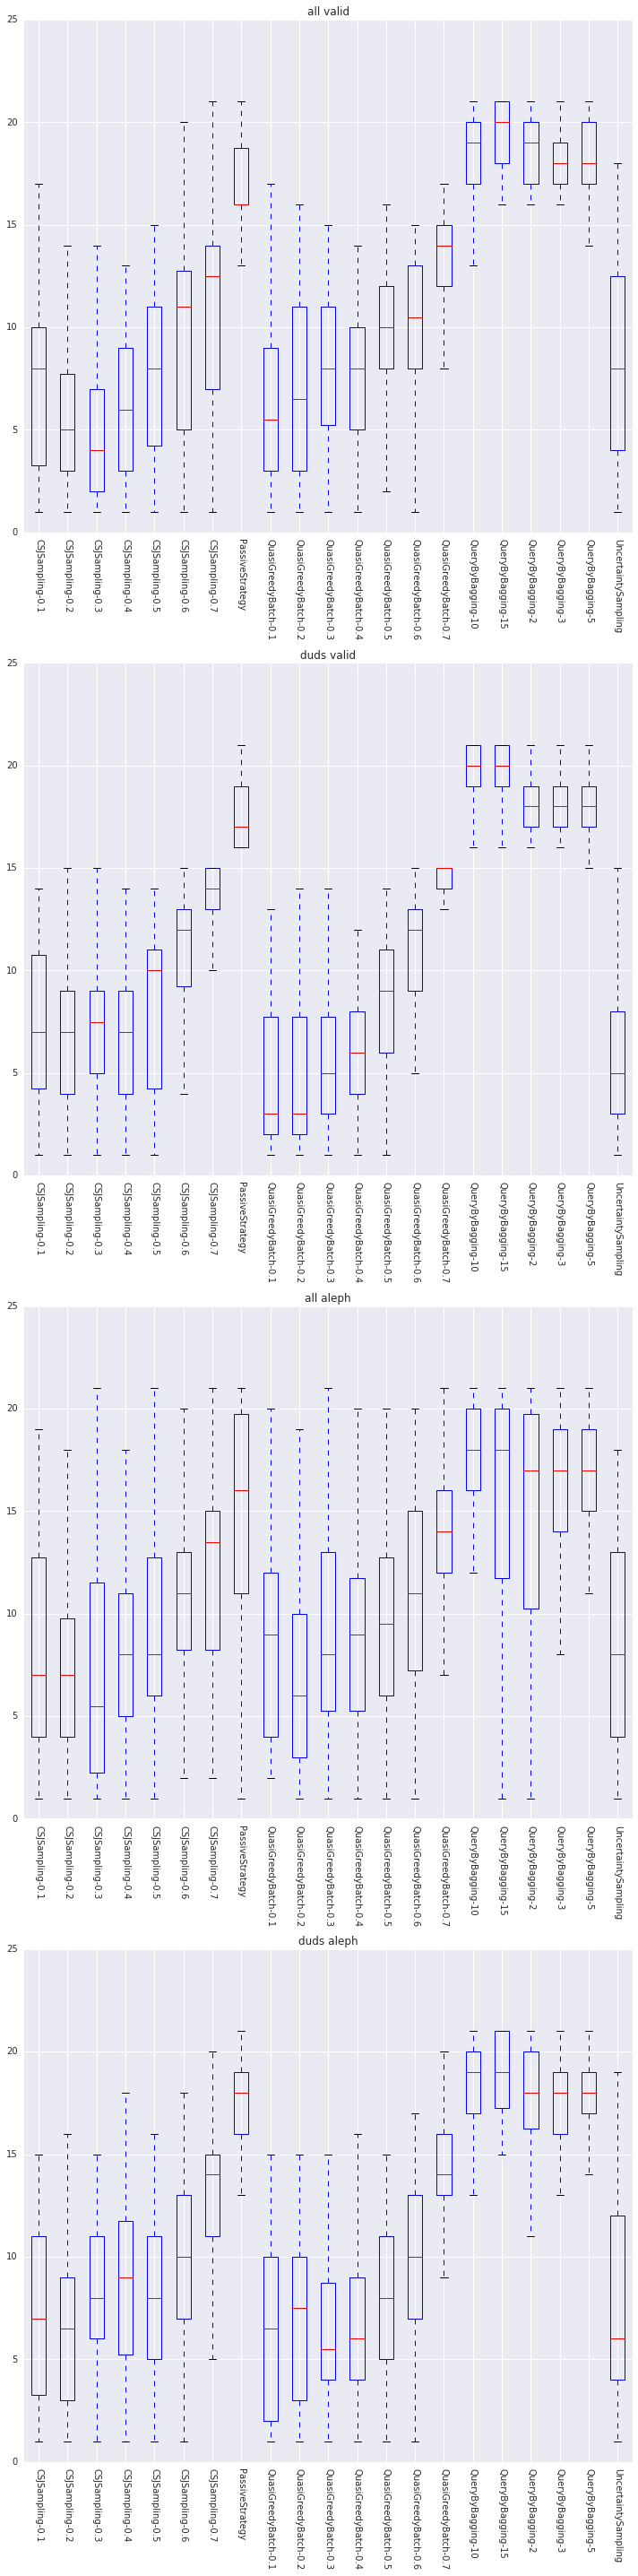

In [226]:
results_dir = os.path.join(RESULTS_DIR, 'SVM')
f = plt.figure(figsize=(10, 40))
i = 1
for metric in ['wac_score_valid_score_auc', "wac_score_valid_aleph_score_auc"]:
    for comp in ['all', 'duds']:
        metric_wins, scores = count_wins(results_dir, metric=metric, compounds=comp)

        ranks = defaultdict(list)
        for d in scores:
            for key, val in d.iteritems():
                ranks[key].append(val)

        title = comp + " " + metric.split('_')[-3]
        df = pd.DataFrame.from_dict(ranks)
        ranks_df = df.rank(axis=1, ascending=False)
        f.add_subplot(4, 1, i)
        ranks_df.boxplot(figsize=(5, 10), rot=270, return_type='axes')
        plt.title(title)
        mean_ranks = pd.DataFrame(ranks_df.mean()).sort_values(by=0)
        mean_ranks.columns = [title]
        display(mean_ranks)
        i += 1
f.tight_layout()

In [107]:
for fp in ['Pubchem', 'Klek', 'Ext']:
    print fp
    df = pd.DataFrame.from_dict(results[fp], orient='index')
    df
    df.columns = ['aleph-duds', 'valid-duds', 'valid+duds', 'aleph', 'aleph+duds', 'valid']
    #df.columns
    df = df[['valid', 'valid+duds',  'valid-duds', 'aleph', 'aleph+duds', 'aleph-duds']]

    print "valid: %.2f which is: %.2f%%" % (np.mean(df['valid+duds'] - df['valid-duds']), 
                                                      np.mean(100*(df['valid+duds'] - df['valid-duds']) / df['valid+duds']))

    print "alpeh: %.2f which is: %.2f%%" % (np.mean(df['aleph+duds'] - df['aleph-duds']), 
                                                      np.mean(100*(df['aleph+duds'] - df['aleph-duds']) / df['aleph+duds']))

    print 
    for strat in ['csj', 'qgb', 'qbb', 'unc', 'pas']:
        start_df = df[[strat in ind for ind in df.index]]

        print strat + " valid: %.2f which is: %.2f%%" % (np.mean(start_df['valid+duds'] - start_df['valid-duds']), 
                                                          np.mean(100*(start_df['valid+duds'] - start_df['valid-duds']) / start_df['valid+duds']))

        print strat + " aleph: %.2f which is: %.2f%%" % (np.mean(start_df['aleph+duds'] - start_df['aleph-duds']), 
                                                          np.mean(100*(start_df['aleph+duds'] - start_df['aleph-duds']) / start_df['aleph+duds']))
        print
    print '\n\n'

Pubchem
valid: 12.44 which is: 11.53%
alpeh: 11.56 which is: 11.25%

csj valid: 10.92 which is: 10.23%
csj aleph: 10.24 which is: 9.98%

qgb valid: 10.80 which is: 10.13%
qgb aleph: 10.17 which is: 9.89%

qbb valid: 14.69 which is: 13.47%
qbb aleph: 13.19 which is: 12.90%

unc valid: 10.45 which is: 9.79%
unc aleph: 10.08 which is: 9.96%

pas valid: 15.37 which is: 14.00%
pas aleph: 14.13 which is: 13.49%




Klek
valid: 10.22 which is: 9.01%
alpeh: 7.60 which is: 6.46%

csj valid: 9.70 which is: 8.36%
csj aleph: 6.84 which is: 5.53%

qgb valid: 9.19 which is: 8.16%
qgb aleph: 6.15 which is: 5.12%

qbb valid: 11.11 which is: 9.75%
qbb aleph: 9.02 which is: 7.65%

unc valid: 9.01 which is: 8.04%
unc aleph: 6.24 which is: 5.43%

pas valid: 12.08 which is: 10.73%
pas aleph: 9.75 which is: 8.57%




Ext
valid: 9.02 which is: 8.05%
alpeh: 8.72 which is: 8.07%

csj valid: 8.59 which is: 7.56%
csj aleph: 8.36 which is: 7.58%

qgb valid: 8.23 which is: 7.33%
qgb aleph: 8.12 which is: 7.49%

qb

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 3 days

    After the trial mode has expired, if you want to use mkl thereafter,
    please purchase a license at http://continuum.io
    


In [221]:
import os
from experiments.analyze import *
import json
import cPickle
import gzip
import seaborn
import pdb
import numpy as np
from collections import defaultdict
import traceback
import pandas as pd
from IPython.display import display

RESULTS_DIR = os.environ.get("MLLS_RESULTS_DIR", None)
CACHE_DIR = os.environ.get("MLLS_CACHE_DIR", None)

pd.set_option('display.max_rows', 500)

In [41]:
COMPOUNDS = ["5-HT7", "5-HT2c", "5-HT2a", "5-HT6", "5-HT1a", "d2"]
FINGERPRINTS = ['Pubchem', 'Ext', 'Klek']
BATCH_SIZES = [20, 50, 100]
STRATEGIES = ['PassiveStrategy', 
              'UncertaintySampling', 
              'QueryByBagging',
              'QuasiGreedyBatch', 
              'CSJSampling']
STRATS = ['pas', 'unc', 'qbb', 'qgb', 'csj']
METRICS = ['wac_score_valid_score_auc', 
           'wac_score_valid_score-duds_auc', 
           'wac_score_valid_aleph_score_auc', 
           'wac_score_valid_aleph_score-duds_auc']

short_names = {'PassiveStrategy': 'pas',
               'UncertaintySampling': 'unc',
               'QueryByBagging': 'qbb',
               'QuasiGreedyBatch': 'qgb',
               'CSJSampling': 'csj'}

ids = [comp + '_' + str(bs) + '_' + strat for strat in STRATS for comp in COMPOUNDS for bs in BATCH_SIZES] 

In [42]:
results = {}
for fp in FINGERPRINTS:
    results[fp] = {strat: {} for strat in ids}
    
    for comp in COMPOUNDS:
        for metric in METRICS:
            if '-duds' in metric:
                comp += '_DUDs'
            results_dir = os.path.join(RESULTS_DIR, 'SVM', comp, fp)
            name = dict_hash({'path': results_dir, 'best_param_metric': metric})
            cache_file = os.path.join(CACHE_DIR, "experiments.analyze", "essential", name + ".json")
            try:
                mean_scores = load_json(cache_file)
            except IOError as e:
                print traceback.format_exc(e)
                pdb.set_trace()
                
            for key, scores in mean_scores.iteritems():
                bs = key.split('-')[-1]
                strat = short_names[key.split('-')[0]]
                
                if '_DUDs' in comp:
                    comp = comp[:-5]
                
                res_key = comp + '_' + bs + '_' + strat
                results[fp][res_key][metric] = scores[metric]
                if '-duds' in metric:
                    non_dud_metric = metric[:-9] + metric[-4:]
                    results[fp][res_key]['d_' + non_dud_metric] = scores[non_dud_metric]